In [ ]:
# Lets import important libraries

# for mathematical operations
import numpy as np
# for dataframe manupulations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#  setting parameters for visualization
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

In [ ]:
# lets read the data set
data = pd.read_csv('/content/insurance.csv')
data.shape

(1338, 7)

In [ ]:
# lets check the head of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# lets check the missing values in the dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# lets check the descriptive summary
data.describe().style.background_gradient(cmap = 'Blues')

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Univariate Analysis**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

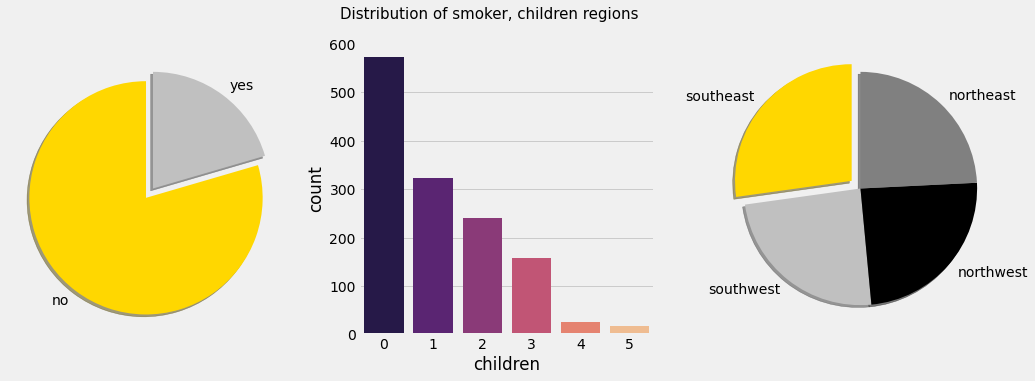

In [ ]:
# lets check the distribution of smoker,children and region

plt.subplot(1,3,1)
plt.pie(data['smoker'].value_counts().values,
        labels= data['smoker'].value_counts().index,
        colors = ['gold','silver'],
        startangle = 90,
        shadow =  True,
        explode = [0.1,0])

plt.subplot(1,3,2)
sns.countplot(data['children'],palette = 'magma')
plt.grid

plt.subplot(1,3,3)
plt.pie(data['region'].value_counts().values,
        labels= data['region'].value_counts().index,
        colors = ['gold','silver','black','grey'],
        startangle = 90,
        shadow =  True,
        explode = [0.1,0,0,0])
plt.suptitle('Distribution of smoker, children regions',fontsize = 15)
plt.show

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.show(*args, **kw)>

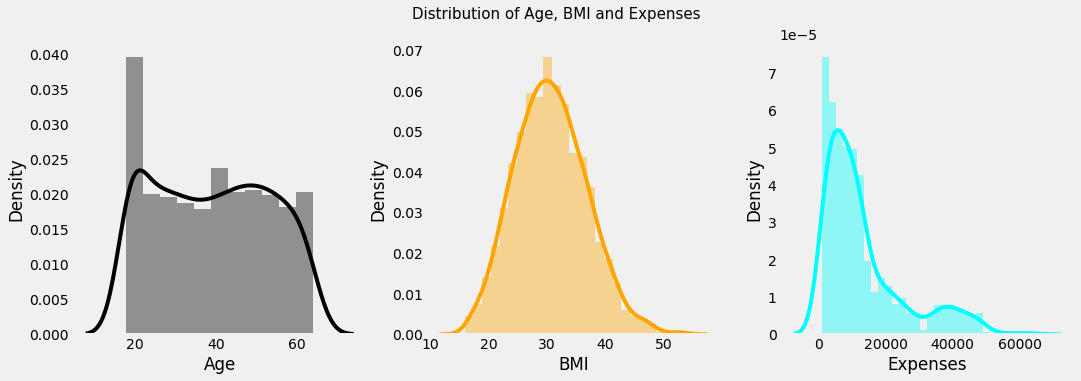

In [ ]:
#lets check the distribution of age,bmi and expenses

plt.subplot(1,3,1)
sns.distplot(data['age'], color = "black")
plt.xlabel('Age')
plt.grid()

plt.subplot(1,3,2)
sns.distplot(data['bmi'], color = "orange")
plt.xlabel('BMI')
plt.grid()

plt.subplot(1,3,3)
sns.distplot(data['charges'], color = "aqua")
plt.xlabel('Expenses')
plt.grid()

plt.suptitle("Distribution of Age, BMI and Expenses", fontsize = 15)
plt.show


**Bivariate Analysis**

In [ ]:
#lets understand the impact of age on medical expenses

px.scatter(data, y = "charges",
           x = "age",
           marginal_y = "violin",
           trendline = "ols")



*   With incresing age, Expenses is expected to increase, but it is not obvious for all the scenarios.





In [ ]:
# lets undestand the impact of bmi on medical expenses
px.scatter(data, y = "charges",
           x = "bmi",
           marginal_y = "violin",
           trendline = "ols")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show(*args, **kw)>

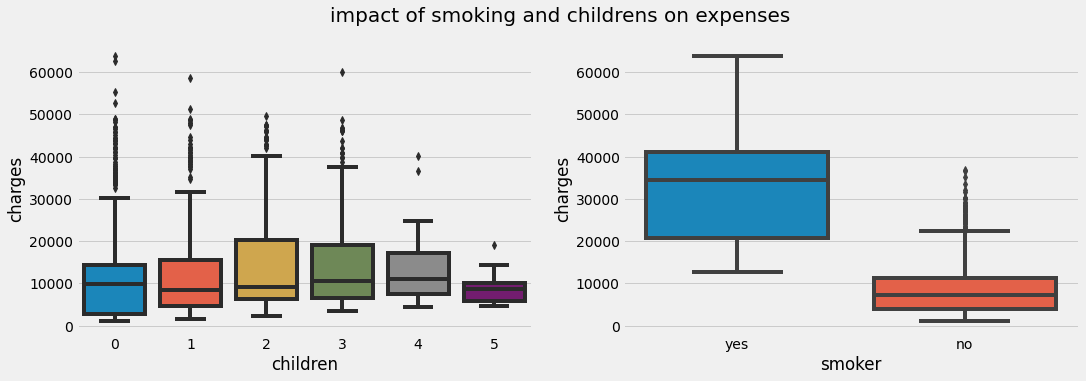

In [ ]:
#lets check the impact of smoking and childrens in medical expenses

plt.subplot(1,2,1)
sns.boxplot(data["children"],data["charges"])

plt.subplot(1,2,2)
sns.boxplot(data["smoker"],data["charges"])

plt.suptitle('impact of smoking and childrens on expenses', fontsize = 20)
plt.show

In [ ]:
# as we can see from the above chart having 4 and 5 children is having similar impact on expenses
#so lets cap these values

data['children'] = data['children'].replace((4,5),(3,3))

#lets check the value counts
data['children'].value_counts()

0    574
1    324
2    240
3    200
Name: children, dtype: int64

In [ ]:
px.scatter(data,
        x= 'charges',
                y = 'age',
                facet_row = 'children',
                facet_col = 'region',
                color = 'smoker',
                trendline= 'ols')

In [ ]:
# bubble chart to represent the relation of expense with bmi ,age,smoking
# only for the northwest region
px.scatter(data,
                x= "charges",
                y= "bmi",
                size= "age",
                color= "smoker",
           hover_name = "charges",size_max=15  )



*   This chart makes it clear that BMI is not a powerful indicator Expenses,as people have less BMI also have high medical expenses.
*   This chart makes it clear that people who smoke also have higher medical expenses.
*   The size of the bubble, which represents age, shows that people have higher expenses belong to higher expenses category





In [ ]:
px.bar_polar(data, r= "charges", theta = 'region', color = 'sex', template = 'plotly_dark',
             color_discrete_sequence= px.colors.sequential.Plasma_r)



*  This chart clearly depits that the southeast region has higher expenses compared to other regions.
*  This chart shows that males have higher expenses in general in all regions.



In [ ]:
# lets check the impact of regions in expenses

data[['charges','region']].groupby(['region']).agg(['min','mean','max']).style.background_gradient(cmap = 'Wistia')


In [ ]:
# as we can see all the columns are important , we will not remove any column
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Data Processing**

In [ ]:
# lets perform encoding 

# as we know males have higher expense than females, lets encode males as 2 , and females as 1,
# similarly smokers,have highers expense, so we will encode smokers as 2, and non smokers as 1,
# as we knbow that the southe east region has higher expenses than other regions.

data['sex'] = data['sex'].replace(('male','female'),(2,1))
data['smoker'] = data['smoker'].replace(('yes','no'),(2,1))
data['region'] = data['region'].replace(('southeast','southwest','northeast','northwest'),(2,1,1,1))

#lets check whether any categorial column is left 
data.select_dtypes('object').columns

Index([], dtype='object')

In [ ]:
#now lets check our data again
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,2,1,16884.92400
1,18,2,33.770,1,1,2,1725.55230
2,28,2,33.000,3,1,2,4449.46200
3,33,2,22.705,0,1,1,21984.47061
4,32,2,28.880,0,1,1,3866.85520


In [ ]:
#lets form dependent and independent sets

y = data["charges"]
x = data.drop(['charges'], axis = 1)

print(y.shape)
print(x.columns)

(1338,)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [ ]:
# lets perform train test split

from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [ ]:
# lets perform the standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Predictive Modelling**

In [ ]:
# lets create the model 

# lets creat a simple regression model
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train,y_train)

y_pred1 = model1.predict(x_test)

In [ ]:
# lets check the model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test,y_pred1)
rmse = np.sqrt(mse)
print("RMSE Score :",rmse)

r2_score = r2_score(y_test,y_pred1)
print("R2 SCore :",r2_score)

RMSE Score : 5665.553449958802
R2 SCore : 0.7982875416675879


In [ ]:
# lets create a random forest model

from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(x_train,y_train)

y_pred2 = model2.predict(x_test)

# lets check the model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test,y_pred2)
rmse = np.sqrt(mse)
print("RMSE Score:",rmse)

r2_score = r2_score(y_test,y_pred2)
print('R2 Score:',r2_score)

RMSE Score: 4496.492163250104
R2 Score: 0.8729438411275335


In [ ]:
# lets create a gradient boosting model

from sklearn.ensemble import GradientBoostingRegressor

model3 = GradientBoostingRegressor()
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)

#lets check the model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test,y_pred3)
rmse = np.sqrt(mse)
print("RMSE Score:", rmse)

r2_score = r2_score(y_test,y_pred3)
print("R2 Score :",r2_score)

RMSE Score: 4047.115132815393
R2 Score : 0.8970706668986248


In [ ]:
# lets create an ensemble by averaging

avg_model = (y_pred1 + y_pred2 + y_pred3)/3

# lets check the model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test,avg_model)
rmse = np.sqrt(mse)
print("R2 Score :",rmse)

r2_score = r2_score(y_test,avg_model)
print("R2 Score:",r2_score)


R2 Score : 4302.644463945
R2 Score: 0.8836627049176237


In [ ]:
# lets create an weighted averaging model 

# lets give 50% weight to gradient boosting
# 30% weight to random forest
# and 20% weight to linear regression

weight_avg_model = 0.2*y_pred1 + 0.3*y_pred2 + 0.5*y_pred3

# lets check the model Accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, weight_avg_model)
rmse = np.sqrt(mse)
print("RMSE Score :",rmse)

r2_score = r2_score(y_test,weight_avg_model)
print("R2_Score :",r2_score)

RMSE Score : 4166.8317128560175
R2_Score : 0.8908911541868159


In [ ]:
# lets perform cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3, x, y, cv = 5)
print(scores)

[0.87222377 0.79101574 0.89386285 0.84580221 0.8562672 ]




*  as we can see that the scores are varying much , so we can say that this model is good.
   



**Comparisons of Models**

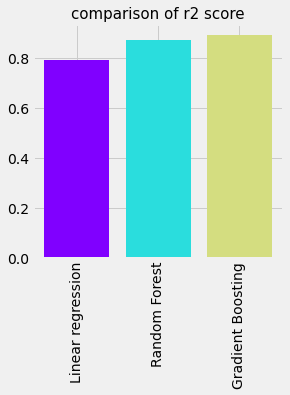

In [ ]:
r2_score = np.array([0.79,0.87,0.89])
labels = np.array(['Linear Regression',"Random Forst",'Gradient Boosting'])
index = np.argsort(r2_score) 
color = plt.cm.rainbow(np.linspace(0,1,4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (4,4)

plt.bar(range(len(index)),r2_score[index],color = color)
plt.xticks(range(0,3),['Linear regression','Random Forest', 'Gradient Boosting'],rotation = 90)
plt.title('comparison of r2 score', fontsize = 15)
plt.show()